<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Случайное-дерево" data-toc-modified-id="Случайное-дерево-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайное дерево</a></span></li><li><span><a href="#Случайный-лес-деревьев" data-toc-modified-id="Случайный-лес-деревьев-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес деревьев</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Метод--upsampling" data-toc-modified-id="Метод--upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метод  upsampling</a></span></li><li><span><a href="#Метод-downsampling" data-toc-modified-id="Метод-downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Метод downsampling</a></span></li><li><span><a href="#Метод-изменения-порога" data-toc-modified-id="Метод-изменения-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Метод изменения порога</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Описание данных:


Признаки
*	`RowNumber` — индекс строки в данных
*	`CustomerId` — уникальный идентификатор клиента
*	`Surname` — фамилия
*	`CreditScore` — кредитный рейтинг
*	`Geography` — страна проживания
*	`Gender` — пол
*	`Age` — возраст
*	`Tenure` — сколько лет человек является клиентом банка
*	`Balance` — баланс на счёте
*	`NumOfProducts` — количество продуктов банка, используемых клиентом
*	`HasCrCard` — наличие кредитной карты
*	`IsActiveMember` — активность клиента
*	`EstimatedSalary` — предполагаемая зарплата

Целевой признак
*	`Exited` — факт ухода клиента



In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.utils import shuffle
import warnings

warnings.simplefilter('ignore')

In [2]:
# считаем файл с данными
try:
    df = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')
except FileNotFoundError:
    df = pd.read_csv('Churn.csv', index_col='RowNumber')    

In [3]:
df.info() # общая информаци о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(5) # первые 5 строк

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.describe() # некоторая статистика по нашим данным

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Первые выводы по полученным данным:
* В столбце `Tenure` есть пропуски;
* Названия столбцов необходимо привести к змеиному стилю;
* Некоторые столбцы выглядят излишними для обучения модели, например фамилия `Surname` у нас есть уникальный идентификатор, проверим что они действительно уникальны.
* В количественных столбцах выбросов не наблюдается, возраст и "стаж клиента" выглядят разумными, отрицательных зар. плат и балансов так же нет.

Начнем с переименовывания столбцов

In [6]:
df.columns.to_list() # список с названиями столбцов

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:
# новые названия
cols_name = ['customer_id',
 'surname',
 'credit_score',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active_member',
 'estimated_salary',
 'exited']
df = df.set_axis(cols_name, axis='columns') # меняем названия
df.info() # смотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            9091 non-null   float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_credit_card   10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Наpвания столбцов поправили. Gерейдем к пропускам в столбце `tenure`. Посмотрим на количество таких пропусков и на возраст людей с пропуском в данном столбце. 

Заменять пропуски будем на среднее значение для данного столбца 5 лет, но если возраст клиента меньше чем 18+5=23. то будем пропуски менять на величину получаемую как возраст клиента - 18 лет.

In [8]:
df['tenure'].isna().sum() # количество пропусков всего

909

In [9]:
df.loc[df['age'] >= 23, 'tenure'].isna().sum() # пропуски у людей старше 22

894

In [10]:
df[df['age'] < 23]['tenure'].isna().sum() # пропуски у людей младше 23

15

Всего пропусков 909, из них 894 людей с возрастом больше ибо равно 23 и соответственно 15 людей моложе 23 лет которым мы вместо среднего значения в пропуски столбца `tenure` присвоим значение возраст - 18

In [11]:
mean_tenure = df[df['age'] > 23]['tenure'].mean() # считаем среднее для людей старше 22
df.loc[df['age'] >= 23, 'tenure'] = mean_tenure #заменяем пропуски на среднее

In [12]:
df.loc[df['age'] >= 23, 'tenure'].isna().sum() # пропуски у людей старше 22

0

Теперь заменим пропуски у людей моложе 23 лет

In [13]:
df.loc[df['age'] < 23, 'tenure'] = df.loc[df['age'] < 23, 'age'] - 18 # замена пропусков
df[df['age'] < 23]['tenure'].isna().sum() # пропуски у людей младше 23

0

In [14]:
df.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_credit_card   10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Отлично! Теперь в нашем наборе данных нет пропусков. Посмотрим подробнее на некоторые категориальные данные - пол, страна проживания. Столбец с полом проверим на отсутствие пола отличного от male и female.
Страну на наличие неявных дубликатов.

In [15]:
df['gender'].value_counts() # уникальные значения столбца с полом

Male      5457
Female    4543
Name: gender, dtype: int64

С полом все хорошо

In [16]:
df['geography'].unique() # уникальные значения столбца со страной

array(['France', 'Spain', 'Germany'], dtype=object)

Со страной так же все в порядке.

Проверим также, что все идентификаторы уникальные.

In [17]:
df['customer_id'].nunique()

10000

Теперь выделим необходимые данные для обучения.

Столбцы с идентификатором клиента и его фамилией для обучения нам не нужны.

In [18]:
df_for_learn = df.drop(['customer_id','surname'], axis=1) # удалим ненужные столбцы
df_for_learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_credit_card   10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 937.5+ KB


Разделим наши данные на признаки и и целевой признак.

In [19]:
# разделим данные на признаки и целевой признак
features = df_for_learn.drop('exited', axis=1)
target = df_for_learn['exited']

Следующий этап предобработки данных перед обучением модели :
- кодирование категориальных признаков - пол и страна проживания;
- масштабирование количественных признаков - возраст, "стаж клиента", количество банковских продуктов, баланс, зар. плата.

Столбцы с данными о наличии кредитной карты и активности пользователя не количественные, а категориальные, их не трогаем.

Начнем с кодирования категориальных данных, использую метод One-Hot-Encoding, что бы не попасть в дамми-ловушку первый получаемый столбец удалим

In [20]:
features = pd.get_dummies(features, drop_first=True) # кодируем категориальные признаки

In [21]:
features.head(10)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,
1,619,42,4.988735,0.00,1,1,1,101348.88,0,0,0
2,608,41,4.988735,83807.86,1,0,1,112542.58,0,1,0
3,502,42,4.988735,159660.80,3,1,0,113931.57,0,0,0
4,699,39,4.988735,0.00,2,0,0,93826.63,0,0,0
5,850,43,4.988735,125510.82,1,1,1,79084.10,0,1,0
6,645,44,4.988735,113755.78,2,1,0,149756.71,0,1,1
7,822,50,4.988735,0.00,2,1,1,10062.80,0,0,1
8,376,29,4.988735,115046.74,4,1,0,119346.88,1,0,0
9,501,44,4.988735,142051.07,2,0,1,74940.50,0,0,1


Займемся масштабированием количественных признаков. 

Для начала разделим выборку на обучающую, валидационну и тестовую выборки в соотношении 3:1:1

In [22]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=314)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=314)

In [23]:
print(features_train.shape, target_train.shape[0]) # обучающая выборка
print(features_valid.shape, target_valid.shape[0]) # валидационная выборка
print(features_test.shape, target_test.shape[0]) #  тестовая выборка

(6000, 11) 6000
(2000, 11) 2000
(2000, 11) 2000


Теперь займемся масштабированием количественных признаков

In [24]:
scaler = StandardScaler()
scaler.fit(features_train[['credit_score','age','tenure','balance','num_of_products','estimated_salary']])

StandardScaler()

In [25]:
features_train[['credit_score','age','tenure','balance','num_of_products','estimated_salary']] =\
scaler.transform(features_train[['credit_score','age','tenure','balance','num_of_products','estimated_salary']])

In [26]:
features_valid[['credit_score','age','tenure','balance','num_of_products','estimated_salary']] =\
scaler.transform(features_valid[['credit_score','age','tenure','balance','num_of_products','estimated_salary']])

In [27]:
features_test[['credit_score','age','tenure','balance','num_of_products','estimated_salary']] =\
scaler.transform(features_test[['credit_score','age','tenure','balance','num_of_products','estimated_salary']])

In [28]:
features_test.head(5)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,
3985,1.904722,-0.082605,0.129643,-1.219919,0.813700,1,1,-0.593759,0,1,1
1770,-0.440927,0.012289,0.129643,0.137704,0.813700,1,1,0.376132,1,0,1
515,-0.461593,1.151011,0.129643,0.968976,-0.914512,1,1,-0.582823,0,0,0
4224,0.788730,1.151011,0.129643,0.507793,0.813700,1,0,0.708274,1,0,0
2805,-0.017263,0.486756,0.129643,-1.219919,0.813700,1,1,-0.730743,0,0,0


Данные подготовлены, можно приступать к обучению модели

## Исследование задачи

Перед обучением моделей, посмотрим на баланс встречаемых целевых признаков в исходных данных и данных для обучения

In [29]:
target.value_counts() / target.shape[0] * 100

0    79.63
1    20.37
Name: exited, dtype: float64

In [30]:
target_train.value_counts() / target_train.shape[0] * 100

0    79.4
1    20.6
Name: exited, dtype: float64

В наших данных присутствует дисбаланс, людей которые ушли из банка (целевой признак 1) примерно 20 процентов. 

Пока будем обучать модели без учета дисбаланса. Посмотрми какие результатаы метрик F1 и AUC ROC будут давать модели на валидационной выборке

Начнем с модели случайного дерева решений

### Случайное дерево

In [31]:
%%time
for depth in range(2, 16):
    model_tree = DecisionTreeClassifier(random_state=314, max_depth=depth) # создаем модель с заданной глубиной
    model_tree.fit(features_train,target_train) # обучаем модель
    predictions = model_tree.predict(features_valid) # получаем предсказание модели
    predictions_one_valid = model_tree.predict_proba(features_valid) # получаем вероятность отнесения к классу
    result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
    # выведем результаты для каждого варианта модели
    print('Глубина дерева',depth,'F1-мера', round(result_f1,4), 'AUC_ROC', round(result_auc_roc,4)) 

Глубина дерева 2 F1-мера 0.5138 AUC_ROC 0.7403
Глубина дерева 3 F1-мера 0.5437 AUC_ROC 0.8051
Глубина дерева 4 F1-мера 0.521 AUC_ROC 0.8274
Глубина дерева 5 F1-мера 0.5377 AUC_ROC 0.8341
Глубина дерева 6 F1-мера 0.5298 AUC_ROC 0.8378
Глубина дерева 7 F1-мера 0.5515 AUC_ROC 0.8345
Глубина дерева 8 F1-мера 0.54 AUC_ROC 0.823
Глубина дерева 9 F1-мера 0.585 AUC_ROC 0.8064
Глубина дерева 10 F1-мера 0.561 AUC_ROC 0.7845
Глубина дерева 11 F1-мера 0.5426 AUC_ROC 0.7624
Глубина дерева 12 F1-мера 0.5413 AUC_ROC 0.7409
Глубина дерева 13 F1-мера 0.5282 AUC_ROC 0.7134
Глубина дерева 14 F1-мера 0.5321 AUC_ROC 0.7253
Глубина дерева 15 F1-мера 0.5368 AUC_ROC 0.7159
Wall time: 369 ms


Лучшее значение меры F1 у дерева с глубиной 9 равное 0.585, при этом значения метрики AUC ROC 0.8064

Запомним лучшее дерево решений

In [32]:
model_tree = DecisionTreeClassifier(random_state=314, max_depth=9)
model_tree.fit(features_train,target_train) # обучаем модель

DecisionTreeClassifier(max_depth=9, random_state=314)

Перейдем к случайному лесу деревьев

### Случайный лес деревьев

In [33]:
%%time
best_result_f1 = 0
best_result_auc_roc = 0
best_forest = None
best_est = 0 
best_depth = 0
for est in np.arange(10, 100, 5):
    for depth in range (2, 16):
        # создаем модель с заданными гиперпараметрами
        model_forest = RandomForestClassifier(random_state=314, max_depth=depth, n_estimators=est)
        model_forest.fit(features_train,target_train) # обучаем модель
        predictions = model_forest.predict(features_valid) # получаем предсказание модели
        predictions_one_valid = model_forest.predict_proba(features_valid) # получаем вероятность отнесения к классу
        result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
        result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
        # найдем лучшую
        if result_f1 > best_result_f1:
            best_result_f1 = result_f1
            best_result_auc_roc = result_auc_roc
            best_forest = model_forest
            best_est = est
            best_depth = depth
print('Лучшая модель леса деревьев с количеством деревьев', best_est,'глубиной дерева',\
      best_depth,'и F1',round(best_result_f1,4),'и AUC ROC',round(best_result_auc_roc,4)) 

Лучшая модель леса деревьев с количеством деревьев 45 глубиной дерева 14 и F1 0.5975 и AUC ROC 0.8588
Wall time: 1min 6s


У случайного леса деревьев F1 немного повыше чем у одного дерева 0.5975, и метрика AUC ROC выше 0.8588.

Посмотрим как себя покажет логистическая регрессия

### Логистическая регрессия

In [34]:
model_logic = LogisticRegression(random_state=314) # создаем модель типа логическая регрессия
model_logic.fit(features_train,target_train) # обучаем модель на тренировочном наборе данных
predictions = model_logic.predict(features_valid) # получаем предсказание модели
predictions_one_valid = model_logic.predict_proba(features_valid)  # получаем вероятность отнесения к классу
result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
print('F1 логистической регрессии', round(result_f1,4), ', AUC ROC логистической регрессии', round(result_auc_roc,4))

F1 логистической регрессии 0.3071 , AUC ROC логистической регрессии 0.7698


У логистической регрессии F1 самый низкий 0.3071, и AUC ROC самый низкий 0.7698

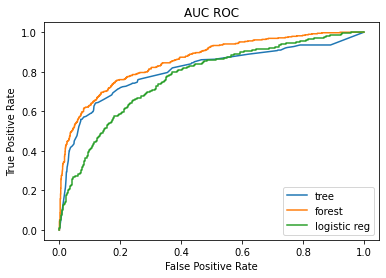

In [35]:
predictions_one_valid = model_tree.predict_proba(features_valid)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = best_forest.predict_proba(features_valid)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = model_logic.predict_proba(features_valid) 
fpr_logic, tpr_logic, thresholds_logic = roc_curve(target_valid,predictions_one_valid[:,1])
plt.plot(fpr_tree, tpr_tree, label='tree')
plt.plot(fpr_forest, tpr_forest, label='forest')
plt.plot(fpr_logic, tpr_logic, label='logistic reg')
plt.title('AUC ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

По метрике F1 лучшая модель - случайный лес деревьев с результатом 0.5975. Попробуем некоторые методы борьбы с дисблансом.

## Борьба с дисбалансом

Для борьбы с дисбалансом будем использовать следующие методы:
 - взвешивание классов;
 - увеличение выборки со значением класса 1;
 - уменьшение выборки со значением класса 0;
 - изменение порога для логистической регрессии.
 
Начнем со взвешивания классов

### Взвешивание классов

In [36]:
%%time
for depth in range(2, 16):
    model_tree = DecisionTreeClassifier(random_state=314, max_depth=depth, class_weight='balanced') # создаем модель с заданной глубиной
    model_tree.fit(features_train,target_train) # обучаем модель
    predictions = model_tree.predict(features_valid) # получаем предсказание модели
    predictions_one_valid = model_tree.predict_proba(features_valid) # получаем вероятность отнесения к классу
    result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
    # выведем результаты для каждого варианта модели
    print('Глубина дерева',depth,'F1-мера', round(result_f1,4), 'AUC_ROC', round(result_auc_roc,4)) 

Глубина дерева 2 F1-мера 0.5234 AUC_ROC 0.7539
Глубина дерева 3 F1-мера 0.5439 AUC_ROC 0.8084
Глубина дерева 4 F1-мера 0.5372 AUC_ROC 0.82
Глубина дерева 5 F1-мера 0.5471 AUC_ROC 0.8363
Глубина дерева 6 F1-мера 0.5908 AUC_ROC 0.8436
Глубина дерева 7 F1-мера 0.5696 AUC_ROC 0.8428
Глубина дерева 8 F1-мера 0.5694 AUC_ROC 0.8064
Глубина дерева 9 F1-мера 0.554 AUC_ROC 0.7751
Глубина дерева 10 F1-мера 0.5385 AUC_ROC 0.7524
Глубина дерева 11 F1-мера 0.5026 AUC_ROC 0.7257
Глубина дерева 12 F1-мера 0.5028 AUC_ROC 0.7083
Глубина дерева 13 F1-мера 0.5028 AUC_ROC 0.7058
Глубина дерева 14 F1-мера 0.4988 AUC_ROC 0.6992
Глубина дерева 15 F1-мера 0.481 AUC_ROC 0.686
Wall time: 333 ms


Запомним лучшее дерево: глубина 6, F1 0.5905, AUC ROC 0.8436

In [37]:
model_tree = DecisionTreeClassifier(random_state=314, max_depth=6)
model_tree.fit(features_train,target_train) # обучаем модель

DecisionTreeClassifier(max_depth=6, random_state=314)

In [38]:
%%time
best_result_f1 = 0
best_result_auc_roc = 0
best_forest = None
best_est = 0 
best_depth = 0
for est in np.arange(10, 100, 5):
    for depth in range (2, 16):
        # создаем модель с заданными гиперпараметрами
        model_forest = RandomForestClassifier(class_weight='balanced', random_state=314, max_depth=depth, n_estimators=est)
        model_forest.fit(features_train,target_train) # обучаем модель
        predictions = model_forest.predict(features_valid) # получаем предсказание модели
        predictions_one_valid = model_forest.predict_proba(features_valid) # получаем вероятность отнесения к классу
        result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
        result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
        # найдем лучшую
        if result_f1 > best_result_f1:
            best_result_f1 = result_f1
            best_result_auc_roc = result_auc_roc
            best_forest = model_forest
            best_est = est
            best_depth = depth
print('Лучшая модель леса деревьев с количеством деревьев', best_est,'глубиной дерева',\
      best_depth,'и F1',round(best_result_f1,4),'и AUC ROC',round(best_result_auc_roc,4)) 

Лучшая модель леса деревьев с количеством деревьев 95 глубиной дерева 8 и F1 0.6244 и AUC ROC 0.8684
Wall time: 1min 6s


In [39]:
model_logic = LogisticRegression(random_state=314, class_weight='balanced') # создаем модель типа логическая регрессия
model_logic.fit(features_train,target_train) # обучаем модель на тренировочном наборе данных
predictions = model_logic.predict(features_valid) # получаем предсказание модели
predictions_one_valid = model_logic.predict_proba(features_valid)  # получаем вероятность отнесения к классу
result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
print('F1 логистической регрессии', round(result_f1,4), ', AUC ROC логистической регрессии', round(result_auc_roc,4))

F1 логистической регрессии 0.4895 , AUC ROC логистической регрессии 0.7732


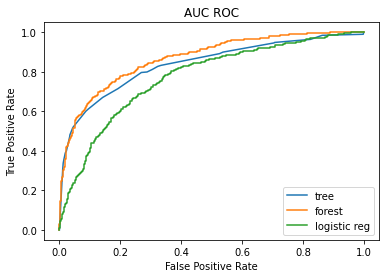

In [40]:
predictions_one_valid = model_tree.predict_proba(features_valid)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = best_forest.predict_proba(features_valid)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = model_logic.predict_proba(features_valid) 
fpr_logic, tpr_logic, thresholds_logic = roc_curve(target_valid,predictions_one_valid[:,1])
plt.plot(fpr_tree, tpr_tree, label='tree')
plt.plot(fpr_forest, tpr_forest, label='forest')
plt.plot(fpr_logic, tpr_logic, label='logistic reg')
plt.title('AUC ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

Взвешивание классов позволило увеличить F1 и AUC ROC у всех моделей. Максимальное значение F1 и AUC ROC у леса деревьев 0.6244 и 0.8684 соответственно.

Попробуем увеличить выборку со значением класса 1, техника `upsampling`

### Метод  upsampling

In [41]:
# напишем функцию для увеличения выборки с 1
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=314)
    return features_upsampled, target_upsampled

Приведем баланс к значению 1:1.

In [42]:
target_train.value_counts() / target_train.shape[0] * 100

0    79.4
1    20.6
Name: exited, dtype: float64

Текущий баланс примерно 4:1

In [43]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

Проверим какой баланс у новых обучающих данных

In [44]:
target_train_upsampled.value_counts() / target_train_upsampled.shape[0] * 100

1    50.92707
0    49.07293
Name: exited, dtype: float64

In [45]:
%%time
for depth in range(2, 16):
    model_tree = DecisionTreeClassifier(random_state=314, max_depth=depth) # создаем модель с заданной глубиной
    model_tree.fit(features_train_upsampled,target_train_upsampled) # обучаем модель
    predictions = model_tree.predict(features_valid) # получаем предсказание модели
    predictions_one_valid = model_tree.predict_proba(features_valid) # получаем вероятность отнесения к классу
    result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
    # выведем результаты для каждого варианта модели
    print('Глубина дерева',depth,'F1-мера', round(result_f1,4), 'AUC_ROC', round(result_auc_roc,4)) 

Глубина дерева 2 F1-мера 0.5234 AUC_ROC 0.7539
Глубина дерева 3 F1-мера 0.5439 AUC_ROC 0.8082
Глубина дерева 4 F1-мера 0.5372 AUC_ROC 0.8203
Глубина дерева 5 F1-мера 0.5485 AUC_ROC 0.8372
Глубина дерева 6 F1-мера 0.5914 AUC_ROC 0.8432
Глубина дерева 7 F1-мера 0.5712 AUC_ROC 0.8404
Глубина дерева 8 F1-мера 0.5824 AUC_ROC 0.8224
Глубина дерева 9 F1-мера 0.5706 AUC_ROC 0.7974
Глубина дерева 10 F1-мера 0.5557 AUC_ROC 0.7703
Глубина дерева 11 F1-мера 0.5281 AUC_ROC 0.749
Глубина дерева 12 F1-мера 0.5206 AUC_ROC 0.724
Глубина дерева 13 F1-мера 0.5196 AUC_ROC 0.7154
Глубина дерева 14 F1-мера 0.507 AUC_ROC 0.7047
Глубина дерева 15 F1-мера 0.4825 AUC_ROC 0.6931
Wall time: 384 ms


Запомним лучшее дерево: глубина 6, F1 0.5914, AUC ROC 0.8432

In [46]:
model_tree = DecisionTreeClassifier(random_state=314, max_depth=6)
model_tree.fit(features_train_upsampled,target_train_upsampled) # обучаем модель

DecisionTreeClassifier(max_depth=6, random_state=314)

In [47]:
%%time
best_result_f1 = 0
best_result_auc_roc = 0
best_forest = None
best_est = 0 
best_depth = 0
for est in np.arange(10, 100, 5):
    for depth in range (2, 16):
        # создаем модель с заданными гиперпараметрами
        model_forest = RandomForestClassifier(random_state=314, max_depth=depth, n_estimators=est)
        model_forest.fit(features_train_upsampled,target_train_upsampled) # обучаем модель
        predictions = model_forest.predict(features_valid) # получаем предсказание модели
        predictions_one_valid = model_forest.predict_proba(features_valid) # получаем вероятность отнесения к классу
        result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
        result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
        # найдем лучшую
        if result_f1 > best_result_f1:
            best_result_f1 = result_f1
            best_result_auc_roc = result_auc_roc
            best_forest = model_forest
            best_est = est
            best_depth = depth
print('Лучшая модель леса деревьев с количеством деревьев', best_est,'глубиной дерева',\
      best_depth,'и F1',round(best_result_f1,4),'и AUC ROC',round(best_result_auc_roc,4)) 

Лучшая модель леса деревьев с количеством деревьев 75 глубиной дерева 12 и F1 0.623 и AUC ROC 0.8629
Wall time: 1min 28s


In [48]:
model_logic = LogisticRegression(random_state=314) # создаем модель типа логическая регрессия
model_logic.fit(features_train_upsampled,target_train_upsampled) # обучаем модель на тренировочном наборе данных
predictions = model_logic.predict(features_valid) # получаем предсказание модели
predictions_one_valid = model_logic.predict_proba(features_valid)  # получаем вероятность отнесения к классу
result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
print('F1 логистической регрессии', round(result_f1,4), ', AUC ROC логистической регрессии', round(result_auc_roc,4))

F1 логистической регрессии 0.4836 , AUC ROC логистической регрессии 0.7733


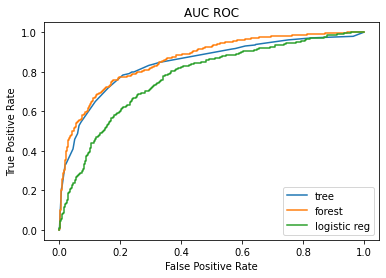

In [49]:
predictions_one_valid = model_tree.predict_proba(features_valid)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = best_forest.predict_proba(features_valid)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = model_logic.predict_proba(features_valid) 
fpr_logic, tpr_logic, thresholds_logic = roc_curve(target_valid,predictions_one_valid[:,1])
plt.plot(fpr_tree, tpr_tree, label='tree')
plt.plot(fpr_forest, tpr_forest, label='forest')
plt.plot(fpr_logic, tpr_logic, label='logistic reg')
plt.title('AUC ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

Наилучший результат снова показывает модель случайного леса деревьев: F1 - 0.6223, AUC ROC - 0.8629.


Попробуем вариант с уменьшением выборки со значением 0. Техника `downsamping`

### Метод downsampling

In [50]:
# напишем функцию для уменьшения выборки с 0
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=314)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=314)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=314)
    return features_downsampled, target_downsampled

In [51]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25) #новые обучающие выборки

In [52]:
target_train_downsampled.value_counts() / target_train_downsampled.shape[0] * 100

1    50.92707
0    49.07293
Name: exited, dtype: float64

In [53]:
%%time
for depth in range(2, 16):
    model_tree = DecisionTreeClassifier(random_state=314, max_depth=depth) # создаем модель с заданной глубиной
    model_tree.fit(features_train_downsampled,target_train_downsampled) # обучаем модель
    predictions = model_tree.predict(features_valid) # получаем предсказание модели
    predictions_one_valid = model_tree.predict_proba(features_valid) # получаем вероятность отнесения к классу
    result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
    # выведем результаты для каждого варианта модели
    print('Глубина дерева',depth,'F1-мера', round(result_f1,4), 'AUC_ROC', round(result_auc_roc,4)) 

Глубина дерева 2 F1-мера 0.5234 AUC_ROC 0.7539
Глубина дерева 3 F1-мера 0.5234 AUC_ROC 0.8015
Глубина дерева 4 F1-мера 0.5372 AUC_ROC 0.815
Глубина дерева 5 F1-мера 0.5442 AUC_ROC 0.8362
Глубина дерева 6 F1-мера 0.537 AUC_ROC 0.8279
Глубина дерева 7 F1-мера 0.5748 AUC_ROC 0.8368
Глубина дерева 8 F1-мера 0.5397 AUC_ROC 0.8062
Глубина дерева 9 F1-мера 0.5231 AUC_ROC 0.7715
Глубина дерева 10 F1-мера 0.5049 AUC_ROC 0.7519
Глубина дерева 11 F1-мера 0.4874 AUC_ROC 0.7363
Глубина дерева 12 F1-мера 0.5 AUC_ROC 0.7242
Глубина дерева 13 F1-мера 0.4798 AUC_ROC 0.7068
Глубина дерева 14 F1-мера 0.4581 AUC_ROC 0.695
Глубина дерева 15 F1-мера 0.4588 AUC_ROC 0.6984
Wall time: 202 ms


Запомним лучшее дерево: глубина 7, F1 0.5748, AUC ROC 0.8368

In [54]:
model_tree = DecisionTreeClassifier(random_state=314, max_depth=7)
model_tree.fit(features_train_downsampled,target_train_downsampled) # обучаем модель

DecisionTreeClassifier(max_depth=7, random_state=314)

In [55]:
%%time
best_result_f1 = 0
best_result_auc_roc = 0
best_forest = None
best_est = 0 
best_depth = 0
for est in np.arange(10, 100, 5):
    for depth in range (2, 16):
        # создаем модель с заданными гиперпараметрами
        model_forest = RandomForestClassifier(random_state=314, max_depth=depth, n_estimators=est)
        model_forest.fit(features_train_downsampled,target_train_downsampled) # обучаем модель
        predictions = model_forest.predict(features_valid) # получаем предсказание модели
        predictions_one_valid = model_forest.predict_proba(features_valid) # получаем вероятность отнесения к классу
        result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
        result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
        # найдем лучшую
        if result_f1 > best_result_f1:
            best_result_f1 = result_f1
            best_result_auc_roc = result_auc_roc
            best_forest = model_forest
            best_est = est
            best_depth = depth
print('Лучшая модель леса деревьев с количеством деревьев', best_est,'глубиной дерева',\
      best_depth,'и F1',round(best_result_f1,4),'и AUC ROC',round(best_result_auc_roc,4)) 

Лучшая модель леса деревьев с количеством деревьев 20 глубиной дерева 8 и F1 0.5938 и AUC ROC 0.8616
Wall time: 43.4 s


In [56]:
model_logic = LogisticRegression(random_state=314) # создаем модель типа логическая регрессия
model_logic.fit(features_train_downsampled,target_train_downsampled) # обучаем модель на тренировочном наборе данных
predictions = model_logic.predict(features_valid) # получаем предсказание модели
predictions_one_valid = model_logic.predict_proba(features_valid)  # получаем вероятность отнесения к классу
result_f1 = f1_score(target_valid,predictions) # считаем F1 меру
result_auc_roc = roc_auc_score(target_valid,predictions_one_valid[:,1]) # считаем AUC ROC меру
print('F1 логистической регрессии', round(result_f1,4), ', AUC ROC логистической регрессии', round(result_auc_roc,4))

F1 логистической регрессии 0.4932 , AUC ROC логистической регрессии 0.7739


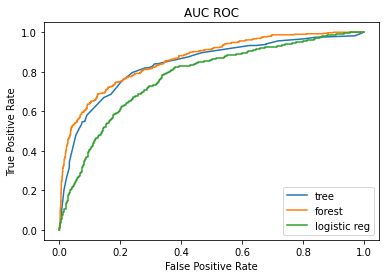

In [57]:
predictions_one_valid = model_tree.predict_proba(features_valid)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = best_forest.predict_proba(features_valid)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid,predictions_one_valid[:,1])
predictions_one_valid = model_logic.predict_proba(features_valid) 
fpr_logic, tpr_logic, thresholds_logic = roc_curve(target_valid,predictions_one_valid[:,1])
plt.plot(fpr_tree, tpr_tree, label='tree')
plt.plot(fpr_forest, tpr_forest, label='forest')
plt.plot(fpr_logic, tpr_logic, label='logistic reg')
plt.title('AUC ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

Наилучший результат снова показывает модель случайного леса деревьев: F1 - 0.5938, AUC ROC - 0.8616. 

### Метод изменения порога

Попробуем изменять порог `threshold` для принятия решения об отнесении к классу 1.

Начнем снова с решающего дерева,  лучшие показатели были у дерева с глубиной 9

In [58]:
model_tree = DecisionTreeClassifier(random_state=314, max_depth=9) # создаем модель с заданной глубиной
model_tree.fit(features_train,target_train) # обучаем модель
probabilities_valid = model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    result_f1 = f1_score(target_valid,predicted_valid) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,probabilities_one_valid) # считаем AUC ROC меру
    print("Порог = {:.2f} | F1 = {:.4f}, AUC ROC = {:.4f}".format(threshold, result_f1, result_auc_roc))

Порог = 0.00 | F1 = 0.3320, AUC ROC = 0.8064
Порог = 0.05 | F1 = 0.4331, AUC ROC = 0.8064
Порог = 0.10 | F1 = 0.5294, AUC ROC = 0.8064
Порог = 0.15 | F1 = 0.5420, AUC ROC = 0.8064
Порог = 0.20 | F1 = 0.5676, AUC ROC = 0.8064
Порог = 0.25 | F1 = 0.6014, AUC ROC = 0.8064
Порог = 0.30 | F1 = 0.5815, AUC ROC = 0.8064
Порог = 0.35 | F1 = 0.5976, AUC ROC = 0.8064
Порог = 0.40 | F1 = 0.5994, AUC ROC = 0.8064
Порог = 0.45 | F1 = 0.5986, AUC ROC = 0.8064
Порог = 0.50 | F1 = 0.5850, AUC ROC = 0.8064
Порог = 0.55 | F1 = 0.5452, AUC ROC = 0.8064
Порог = 0.60 | F1 = 0.5415, AUC ROC = 0.8064
Порог = 0.65 | F1 = 0.5320, AUC ROC = 0.8064
Порог = 0.70 | F1 = 0.5226, AUC ROC = 0.8064
Порог = 0.75 | F1 = 0.5169, AUC ROC = 0.8064
Порог = 0.80 | F1 = 0.5102, AUC ROC = 0.8064
Порог = 0.85 | F1 = 0.4764, AUC ROC = 0.8064
Порог = 0.90 | F1 = 0.4485, AUC ROC = 0.8064
Порог = 0.95 | F1 = 0.3793, AUC ROC = 0.8064


Лучшее значение F1 - 0.6014 у дерева решений при пороге 0.25. AUC ROC соответственно не меняется, по определению.

Далее попробуем поработать со случайным лесом деревьев, лучшие покзатели на дизбалансных данных были у леса из 45 деревьев глубиной 14

In [59]:
model_forest = RandomForestClassifier(random_state=314, max_depth=14, n_estimators=45) # создаем модель с заданной глубиной и количеством деревьев
model_forest.fit(features_train,target_train) # обучаем модель
probabilities_valid = model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    result_f1 = f1_score(target_valid,predicted_valid) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,probabilities_one_valid) # считаем AUC ROC меру
    print("Порог = {:.2f} | F1 = {:.4f}, AUC ROC = {:.4f}".format(threshold, result_f1, result_auc_roc))

Порог = 0.00 | F1 = 0.3254, AUC ROC = 0.8588
Порог = 0.05 | F1 = 0.4074, AUC ROC = 0.8588
Порог = 0.10 | F1 = 0.4773, AUC ROC = 0.8588
Порог = 0.15 | F1 = 0.5242, AUC ROC = 0.8588
Порог = 0.20 | F1 = 0.5748, AUC ROC = 0.8588
Порог = 0.25 | F1 = 0.6051, AUC ROC = 0.8588
Порог = 0.30 | F1 = 0.6154, AUC ROC = 0.8588
Порог = 0.35 | F1 = 0.6296, AUC ROC = 0.8588
Порог = 0.40 | F1 = 0.6176, AUC ROC = 0.8588
Порог = 0.45 | F1 = 0.6045, AUC ROC = 0.8588
Порог = 0.50 | F1 = 0.5975, AUC ROC = 0.8588
Порог = 0.55 | F1 = 0.5647, AUC ROC = 0.8588
Порог = 0.60 | F1 = 0.5308, AUC ROC = 0.8588
Порог = 0.65 | F1 = 0.4964, AUC ROC = 0.8588
Порог = 0.70 | F1 = 0.4630, AUC ROC = 0.8588
Порог = 0.75 | F1 = 0.4213, AUC ROC = 0.8588
Порог = 0.80 | F1 = 0.3466, AUC ROC = 0.8588
Порог = 0.85 | F1 = 0.2693, AUC ROC = 0.8588
Порог = 0.90 | F1 = 0.1553, AUC ROC = 0.8588
Порог = 0.95 | F1 = 0.0551, AUC ROC = 0.8588


Для модели случайного леса лучшее значение F1 0.6296 при пороге 0.35.

Теперь посмотрим на результаты логистической регрессии

In [60]:
model_logic = LogisticRegression(random_state=314) # создаем модель с заданной глубиной и количеством деревьев
model_logic.fit(features_train,target_train) # обучаем модель
probabilities_valid = model_logic.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    result_f1 = f1_score(target_valid,predicted_valid) # считаем F1 меру
    result_auc_roc = roc_auc_score(target_valid,probabilities_one_valid) # считаем AUC ROC меру
    print("Порог = {:.2f} | F1 = {:.4f}, AUC ROC = {:.4f}".format(threshold, result_f1, result_auc_roc))

Порог = 0.00 | F1 = 0.3250, AUC ROC = 0.7698
Порог = 0.05 | F1 = 0.3487, AUC ROC = 0.7698
Порог = 0.10 | F1 = 0.4021, AUC ROC = 0.7698
Порог = 0.15 | F1 = 0.4600, AUC ROC = 0.7698
Порог = 0.20 | F1 = 0.4759, AUC ROC = 0.7698
Порог = 0.25 | F1 = 0.4872, AUC ROC = 0.7698
Порог = 0.30 | F1 = 0.4734, AUC ROC = 0.7698
Порог = 0.35 | F1 = 0.4432, AUC ROC = 0.7698
Порог = 0.40 | F1 = 0.3790, AUC ROC = 0.7698
Порог = 0.45 | F1 = 0.3617, AUC ROC = 0.7698
Порог = 0.50 | F1 = 0.3071, AUC ROC = 0.7698
Порог = 0.55 | F1 = 0.2759, AUC ROC = 0.7698
Порог = 0.60 | F1 = 0.2110, AUC ROC = 0.7698
Порог = 0.65 | F1 = 0.1358, AUC ROC = 0.7698
Порог = 0.70 | F1 = 0.0878, AUC ROC = 0.7698
Порог = 0.75 | F1 = 0.0549, AUC ROC = 0.7698
Порог = 0.80 | F1 = 0.0204, AUC ROC = 0.7698
Порог = 0.85 | F1 = 0.0153, AUC ROC = 0.7698
Порог = 0.90 | F1 = 0.0051, AUC ROC = 0.7698
Порог = 0.95 | F1 = 0.0000, AUC ROC = 0.7698


Для модели логистической регрессии лучшее значение F1 0.4872 при пороге 0.25

Лучшие показатели F1 0.6244 и AUC ROC 0.8684 дает модель случайного леса из 95 деревьев с макисмальной глубиной 8 при обучении модели со взвешиванием классов. Сохраним модель

In [61]:
best_model = RandomForestClassifier(class_weight='balanced', random_state=314, max_depth=8, n_estimators=95)
best_model.fit(features_train, target_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=95,
                       random_state=314)

## Тестирование модели

Проверим нашу лучшую модель на тестовой выборке и посчитаем F1 и AUC ROC метрики

F1 0.6243 и AUC ROC 0.8595


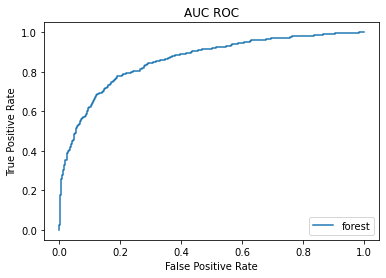

In [62]:
predictions = best_model.predict(features_test) # получаем предсказание модели
predictions_one_valid = best_model.predict_proba(features_test) # получаем вероятность отнесения к классу
result_f1 = f1_score(target_test,predictions) # считаем F1 меру
result_auc_roc = roc_auc_score(target_test,predictions_one_valid[:,1]) # считаем AUC ROC меру
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_test,predictions_one_valid[:,1])
print('F1',round(result_f1,4),'и AUC ROC',round(result_auc_roc,4))
plt.plot(fpr_forest, tpr_forest, label='forest')
plt.title('AUC ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

Не тестовых данных значения чуть ниже чем на проверочных:
- F1 0.6243 против 0.6244;
- AUC ROC 0.8595 против 0.8683.

Цель получить метрику F1 выше 0.59 мы достигли.

## Вывод

Мы построили модель для предсказания уйдет ли клиент из банка в ближайшее время или нет. 
Для получения заданного значения метрики F1 0.59 выполнили следующие шаги:
- провели предобработку данных, были пропуске в столбце `Tenure` — сколько лет человек является клиентом банка;
- удалили лишние данные, не нужные для обучния модели;
- провели подготовительную обработку признаков (категориальные методом прямого кодирования, количественные с помощью масштабирования);
- построили модели различного типа с разными гиперпараметрами;
- для повышения метрик полученных моделей использовали методы борьбы с дисбалансом классов, такие как: взвешивание классов, upscaling и downscaling.

Лучшие результаты показала модель случайного леса деревьев с использование метода масштабирования классов F1 - 0.6244.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 3: учтён дисбаланс
    - [X]  Применено несколько способов борьбы с дисбалансом
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 4: проведено тестирование
- [X]  Удалось достичь *F1*-меры не менее 0.59
- [X]  Исследована метрика *AUC-ROC*